In [ ]:
pip install nltk

In [2]:
import nltk
nltk.download('punkt')
import collections
from nltk.tokenize import word_tokenize

from nltk.util import ngrams



[nltk_data] Downloading package punkt to /home/manpreet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [4]:
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('No GPU available, training on CPU; consider making n_epochs very small.')


Training on GPU!


In [5]:
import io
import shutil

with io.open('Text.txt', encoding="utf8") as file:
           
            text = file.read()
            text1=text.rstrip('\n')
            tokens = word_tokenize(text1)

In [6]:
Bigrams = ngrams(tokens, 2)
BigramFreq = collections.Counter(Bigrams)


trigrams = [([tokens[i], tokens[i + 1]], tokens[i + 2])
            for i in range(len(tokens) - 2)]




In [7]:
vocab = set(tokens)
word_to_ix = {word: i for i, word in enumerate(vocab)}
vocab_len=len(vocab)


ix_to_word = {}
for i, word in enumerate(word_to_ix.keys()):
    ix_to_word[i] = word




In [8]:
ix_to_word[3531]

'Imitated.'

In [9]:
sorted_bigrams = sorted(BigramFreq.items(), key = lambda pair:pair[1], reverse = True)
sorted_bigrams1 = sorted(BigramFreq.items(), key = lambda pair:pair[1], reverse = False)

a= sorted_bigrams[:20]
b= sorted_bigrams1[:20]
c= sorted_bigrams[2650:2670]
d = sorted_bigrams1[2650:2670]

e = a+b+c+d

In [10]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:

from numpy import array

vocab_array = array(vocab)
#print(vocab_array)

vocab_list = vocab_array.tolist()

print(vocab_list)


data = list(vocab_list)
#print(data)

values = array(data)
print(values)


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

{'Heh', 'positively', 'fashionable', 'housemaid', 'silvered', 'See', 'does', 'footpath', 'MYSTERY', 'figure', 'fair', 'drunken-looking', 'daintiest', 'assistants', 'repulsive', 'clutching', 'magnificent', 'Bachelor', 'well-groomed', 'year', 'found.', 'Public', 'definite', 'maybe', 'villages', 'NEGLIGENCE', 'Witness', 'marked', 'slang', 'slurred', 'Southampton', 'two-storied', 'accidental', 'disappearance', 'Watson', 'apartment', 'falling', 'all-important', 'chase', 'rift', 'wonderful', 'denying', 'homme', 'Mrs', 'displayed', 'frighten', 'else.', '1.B', 'despair', 'obedience', 'Five', 'earshot', 'lichen-blotched', 'moonshine', 'memory', 'clapped', 'win', 'Daily', 'dressed', 'began', 'railway', 'frowning', 'became', 'moment', 'Scott', 'yours.', 'braved', 'united', 'WARRANTY', 'Edgeware', 'band', 'insinuating', 'smoke-laden', 'BEECHES', 'office.', 'red-covered', 'patches', 'pale-looking', 'Anderson_', 'suggested', 'senior', 'electronic', 'great', 'dark', 'director', 'beauties', 'shape—a',

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded[:2])
print(len(onehot_encoded))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
10096


In [13]:
context_size = 2 
embedding_dimension = 300 

class NGramLanguageModeler(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 300)
        self.hidden = nn.Linear(300,300)
        self.linear2 = nn.Linear(300, vocab_size)

    def forward(self, context_idxs):
        embeds = self.embeddings(context_idxs).view((1, -1))
        out = torch.sigmoid(self.linear1(embeds))
        out = torch.sigmoid(self.hidden(out))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs


In [14]:

losses = []
loss_function = nn.NLLLoss()

model = NGramLanguageModeler(len(vocab),embedding_dimension, context_size).cuda()

optimizer = optim.SGD(model.parameters(), lr=0.003)

for epoch in range(120):
    total_loss = 0
    for context, target in trigrams:

        
         context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long).cuda()
         #context_onehot = torch.nn.functional.one_hot( context_idxs, num_classes=-1)
        
    
         model.zero_grad()

         log_probs = model(context_idxs)

         target_ids = torch.tensor([word_to_ix[target]], dtype=torch.long).cuda()
         #target_onehot = torch.nn.functional.one_hot( target_ids, num_classes=-1)
        
         loss = loss_function(log_probs, target_ids.cuda())

        
         loss.backward()
         optimizer.step()

       
         total_loss += loss.item()
    losses.append(total_loss)
    
    print(losses)
    #if epoch % 50 ==0:
        #print(losses)
        

/home/manpreet/anaconda3/envs/man/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[795104.0494570732]
[795104.0494570732, 732118.4104804993]
[795104.0494570732, 732118.4104804993, 705099.4075036049]
[795104.0494570732, 732118.4104804993, 705099.4075036049, 689261.1654424667]
[795104.0494570732, 732118.4104804993, 705099.4075036049, 689261.1654424667, 677409.039706707]
[795104.0494570732, 732118.4104804993, 705099.4075036049, 689261.1654424667, 677409.039706707, 667537.6683335304]
[795104.0494570732, 732118.4104804993, 705099.4075036049, 689261.1654424667, 677409.039706707, 667537.6683335304, 658943.932135582]
[795104.0494570732, 732118.4104804993, 705099.4075036049, 689261.1654424667, 677409.039706707, 667537.6683335304, 658943.932135582, 651213.895945549]
[795104.0494570732, 732118.4104804993, 705099.4075036049, 689261.1654424667, 677409.039706707, 667537.6683335304, 658943.932135582, 651213.895945549, 644107.8151435852]
[795104.0494570732, 732118.4104804993, 705099.4075036049, 689261.1654424667, 677409.039706707, 667537.6683335304, 658943.932135582, 651213.8959455

In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


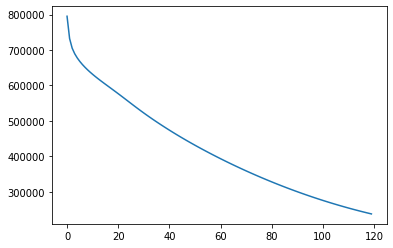

In [16]:

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(losses)




In [17]:
bi_list = list()
for data, frequency in e:
   
    bi_list.append(data)

In [18]:
from numpy import array
bi_list_array = array(bi_list)
print(bi_list_array[:2])

[[',' 'and']
 ['”' '“']]


In [19]:
index_list = list()


    
for context in bi_list_array:

    context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long).cuda()
    model.zero_grad()

    log_probs = model(context_idxs)
        #print(log_probs)
    index_word= torch.argmax(log_probs).tolist()
        
    
        #print(ix_to_word)
    
    index_list.append(index_word)
    
    



    
    
    
    

/home/manpreet/anaconda3/envs/man/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [20]:
len(index_list)

80

In [21]:
index_list

[7818,
 3276,
 5258,
 834,
 2458,
 8246,
 1741,
 6521,
 5190,
 7519,
 1971,
 9977,
 834,
 6381,
 2117,
 8215,
 6682,
 3879,
 7945,
 7945,
 920,
 9159,
 408,
 2117,
 2223,
 8860,
 920,
 9159,
 8860,
 10035,
 7266,
 8862,
 8860,
 7498,
 3355,
 4204,
 5964,
 3508,
 3262,
 6031,
 5094,
 9316,
 4583,
 4759,
 4952,
 2756,
 8597,
 3614,
 6668,
 4204,
 7168,
 4204,
 7671,
 7062,
 4204,
 1441,
 6824,
 2756,
 6325,
 7945,
 4204,
 7456,
 8051,
 4204,
 2734,
 4759,
 9816,
 4759,
 834,
 813,
 9316,
 834,
 4204,
 834,
 6381,
 340,
 7931,
 9916,
 3637,
 9316]

In [22]:
predict_val = [ix_to_word.get(index, 0) for index in index_list]
print(predict_val)

['we', 'You', 'It', 'Project', 'think', 'asked', 'United', 'said', 'am', 'not', 'she', 'can', 'Project', 'Holmes', 'no', 'was', 'Oh', 'must', 'Foundation', 'Foundation', 'The', 'Adventures', 'eBook', 'no', 'Title', ':', 'The', 'Adventures', ':', 'Arthur', 'Conan', 'Date', ':', 'November', '29', ',', 'dear', '[', 'EBook', '#', 'been', 'the', '!', 'of', 'who', '’', 'Rucastle', 'matter', 'points', ',', 'piece', ',', 'visitor', 'anxious', ',', 'he', 'vague', '’', 'Mrs.', 'Foundation', ',', 'are', 'maids—joined', ',', 'a', 'of', 'clouds', 'of', 'Project', 'through', 'the', 'Project', ',', 'Project', 'Holmes', 'under', 'them', 'that', 'at', 'the']


In [23]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [24]:
import csv 
import pandas as pd 
pd.DataFrame({'input':bi_list, 'output': predict_val}).to_csv('result.csv')

In [25]:
weight = model.linear2.weight.data.cpu()

In [26]:
weight.size()

torch.Size([10096, 300])

In [27]:
weight_list=[]

for i in index_list:
    weights = weight[i]
    
    weight_list.append(weights)

In [28]:
weight_tensor = torch.stack(weight_list).cpu()

In [29]:
type(weight_tensor)

torch.Tensor

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(weight_tensor)

In [31]:
len(principalComponents)

80

In [32]:
principalComponents

array([[-0.29782149,  1.10702343],
       [-0.85066063, -1.1822789 ],
       [-1.90492666, -0.62152692],
       [-2.48580477, -0.67142263],
       [-1.15495259, -0.82927856],
       [-0.88780854, -0.85948696],
       [-1.73994509, -1.26909249],
       [-0.60261676,  0.19091539],
       [-1.01502175, -0.93129898],
       [-0.52644128, -0.69691926],
       [-1.58953079,  0.76534032],
       [-0.25874357, -0.46737181],
       [-2.48580477, -0.67142263],
       [-1.63232783, -1.08450633],
       [-1.64244595, -0.96474262],
       [-0.51444373,  0.25791322],
       [-1.31257846, -1.6759607 ],
       [-1.12215472, -0.19165165],
       [-1.48099124, -1.67623684],
       [-1.48099124, -1.67623684],
       [-1.05933641,  0.33695294],
       [-1.02573257, -1.22785705],
       [-0.99105608, -1.34749939],
       [-1.64244595, -0.96474262],
       [-0.94927491, -0.96043403],
       [-0.56230175, -0.50107515],
       [-1.05933641,  0.33695294],
       [-1.02573257, -1.22785705],
       [-0.56230175,

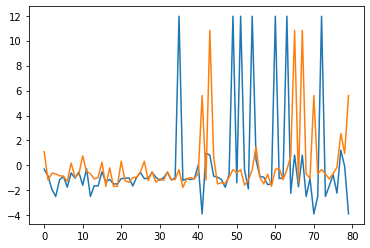

In [33]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(principalComponents)


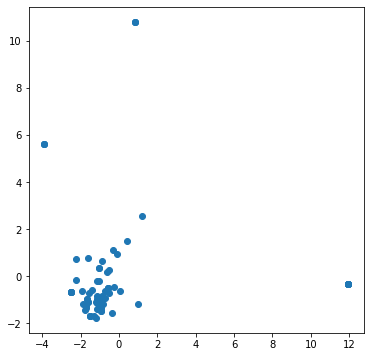

In [34]:
fig = plt.figure(figsize=(6,6))
plt.scatter(principalComponents[:,0],principalComponents[:,1])
plt.show()

In [35]:
weight.cpu()

tensor([[-0.0970,  0.1158,  0.1043,  ...,  0.1190,  0.0734,  0.1448],
        [-0.0652, -0.0618,  0.0315,  ..., -0.1143,  0.1087,  0.0412],
        [-0.1019, -0.0708, -0.0653,  ...,  0.0746, -0.0764,  0.0119],
        ...,
        [-0.1635,  0.1011, -0.0519,  ...,  0.1847,  0.1418,  0.0539],
        [ 0.1870,  0.0018, -0.0129,  ..., -0.0557,  0.2030, -0.0443],
        [ 0.1751,  0.0819,  0.0817,  ...,  0.3442, -0.2351, -0.0289]])

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents2 = pca.fit_transform(weight)

In [37]:
len(principalComponents2)

10096

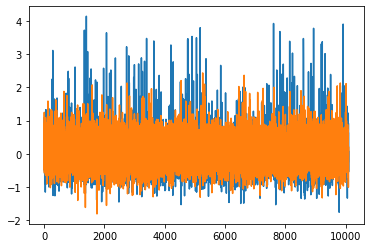

In [38]:
import matplotlib.pyplot as plt


plt.figure()
plt.plot(principalComponents2)


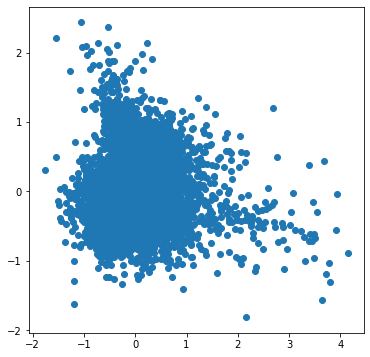

In [39]:
fig = plt.figure(figsize=(6,6))
plt.scatter(principalComponents2[:,0],principalComponents2[:,1])
plt.show()

In [40]:
from sklearn.cluster import KMeans
    
kmeans = KMeans(n_clusters=17, random_state=0).fit(principalComponents2)

In [41]:
cluster = kmeans.cluster_centers_

print(cluster)

[[-0.40633962  0.19478384]
 [ 0.09210142  0.38177876]
 [ 0.32151066 -0.63756714]
 [ 1.72729373 -0.20697252]
 [-0.59719436 -0.60360385]
 [-0.49175338  1.53727558]
 [ 2.98870489 -0.5604826 ]
 [-0.42960049 -0.17860374]
 [-0.25018151  0.84372907]
 [ 0.75830615 -0.30745553]
 [-0.75173185 -0.07860084]
 [-0.03385632 -0.04376239]
 [ 0.38244675  0.69635595]
 [ 0.27560846 -0.24593659]
 [ 0.92855807  0.42536211]
 [-0.10007515 -0.47573476]
 [ 0.38824311  0.14851793]]


In [42]:
label = kmeans.labels_
print(label)


[ 8  9  7 ... 11  1 14]


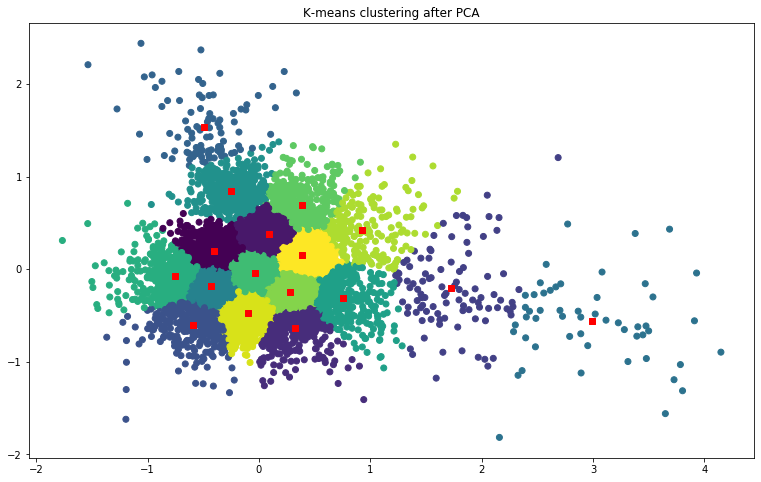

In [43]:
fig = plt.figure(figsize=(13,8))


plt.scatter(principalComponents2[:, 0], principalComponents2[:, -1], c=kmeans.labels_.astype(float))

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r', marker='s')

   
plt.title('K-means clustering after PCA')
plt.show()

In [44]:
test_values = kmeans.predict(principalComponents)


In [45]:
test_values


array([ 8,  4, 10, 10,  4,  4,  4,  0,  4,  4, 10, 15, 10,  4,  4,  0,  4,
       10,  4,  4, 10,  4,  4,  4,  4,  4, 10,  4,  4,  4,  4,  4,  4,  4,
        4,  6,  4,  4,  4,  4, 15,  5,  2,  5,  0,  4,  4,  4,  4,  6,  4,
        6,  4,  4,  6, 12,  4,  4,  4,  4,  6, 10,  4,  6, 10,  5,  4,  5,
       10,  4,  5, 10,  6, 10,  4,  4, 10,  5,  8,  5], dtype=int32)

In [180]:
aa = cluster[4:]

array([[-0.59719436, -0.60360385],
       [-0.49175338,  1.53727558],
       [ 2.98870489, -0.5604826 ],
       [-0.42960049, -0.17860374],
       [-0.25018151,  0.84372907],
       [ 0.75830615, -0.30745553],
       [-0.75173185, -0.07860084],
       [-0.03385632, -0.04376239],
       [ 0.38244675,  0.69635595],
       [ 0.27560846, -0.24593659],
       [ 0.92855807,  0.42536211],
       [-0.10007515, -0.47573476],
       [ 0.38824311,  0.14851793]])

In [47]:
cluster[6:]

array([[ 2.98870489, -0.5604826 ],
       [-0.42960049, -0.17860374],
       [-0.25018151,  0.84372907],
       [ 0.75830615, -0.30745553],
       [-0.75173185, -0.07860084],
       [-0.03385632, -0.04376239],
       [ 0.38244675,  0.69635595],
       [ 0.27560846, -0.24593659],
       [ 0.92855807,  0.42536211],
       [-0.10007515, -0.47573476],
       [ 0.38824311,  0.14851793]])

In [190]:
import numpy as np 
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

dictlist = list()
for key, value in mydict.items():
    temp = [key,value]
    dictlist.append(temp)

In [219]:
dictlist[3]

[3,
 array([   58,   268,   299,   340,   427,   686,   729,   813,   908,
         1191,  1329,  1457,  1496,  1522,  1590,  1655,  1703,  2117,
         2225,  2555,  2558,  2821,  2824,  2993,  3044,  3184,  3261,
         3420,  3714,  3719,  3721,  3765,  3879,  4140,  4252,  4273,
         4520,  4583,  4599,  4638,  4691,  4729,  4812,  4918,  4952,
         5200,  5230,  5233,  5242,  5264,  5301,  5332,  5458,  5563,
         5573,  5682,  5745,  5899,  6016,  6446,  6492,  6495,  6602,
         6656,  7088,  7214,  7303,  7383,  7384,  7421,  7430,  7456,
         7519,  7781,  7961,  7974,  8023,  8215,  8300,  8398,  8485,
         8777,  8860,  9125,  9266,  9272,  9322,  9333,  9396,  9405,
         9406,  9493,  9817,  9823,  9851,  9862,  9893,  9923,  9977,
        10080])]

In [212]:
def ClusterIndicesNumpy(clustNum, labels_array): 
    return np.where(labels_array == clustNum)[0]

In [217]:
index_array = ClusterIndicesNumpy(3, kmeans.labels_)
print(len(index_array))



100


In [214]:
predict_value = [ix_to_word.get(index, 0) for index in index_array]
print(predict_value)

['dressed', 'after', 'well', 'under', 'waiting', 'across', 'behind', 'through', 'slowly', '(', 'yesterday', 's', 'why', 'again', 'but', 'than', 'away', 'no', 'founded', 'immediately', 'those', 'enough', 'some', 'I', 'together', 'found', 'anything', 'warmly', 'amid', 'everything', 'their', 'either', 'must', 'four', 'its', 'about', 'so', '!', 'like', 'alone', 'or', 'whose', 'were', 'has', 'who', 'Briony', 'save', 'gone', 'came', 'against', 'to-night', 'forward', 'they', 'beside', 'yourself', 'seemed', 'now', 'nor', 'even', 'be', 'yet', 'once', 'is', 'something', 'below', 'because', 'every', 'to-morrow', 'how', 'whatever', 'any', 'are', 'not', 'towards', 'myself', 'during', 'since', 'was', 'whether', 'nothing', 'Miss', 'herself', ':', 'among', 'could', 'forever', 'each', 'anyone', 'itself', 'these', 'near', 'just', 'OF', 'down', 'within', 'another', 'too', 'out', 'can', 'Farm']


In [223]:
import nltk 
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/manpreet/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [224]:
nltk.pos_tag(predict_value)

[('dressed', 'VBN'),
 ('after', 'IN'),
 ('well', 'RB'),
 ('under', 'IN'),
 ('waiting', 'VBG'),
 ('across', 'IN'),
 ('behind', 'IN'),
 ('through', 'IN'),
 ('slowly', 'RB'),
 ('(', '('),
 ('yesterday', 'NN'),
 ('s', 'VBZ'),
 ('why', 'WRB'),
 ('again', 'RB'),
 ('but', 'CC'),
 ('than', 'IN'),
 ('away', 'RB'),
 ('no', 'DT'),
 ('founded', 'JJ'),
 ('immediately', 'RB'),
 ('those', 'DT'),
 ('enough', 'IN'),
 ('some', 'DT'),
 ('I', 'PRP'),
 ('together', 'RB'),
 ('found', 'VBD'),
 ('anything', 'NN'),
 ('warmly', 'RB'),
 ('amid', 'IN'),
 ('everything', 'NN'),
 ('their', 'PRP$'),
 ('either', 'CC'),
 ('must', 'MD'),
 ('four', 'CD'),
 ('its', 'PRP$'),
 ('about', 'IN'),
 ('so', 'RB'),
 ('!', '.'),
 ('like', 'IN'),
 ('alone', 'RB'),
 ('or', 'CC'),
 ('whose', 'WP$'),
 ('were', 'VBD'),
 ('has', 'VBZ'),
 ('who', 'WP'),
 ('Briony', 'NNP'),
 ('save', 'VBP'),
 ('gone', 'VBN'),
 ('came', 'VBD'),
 ('against', 'IN'),
 ('to-night', 'JJ'),
 ('forward', 'NN'),
 ('they', 'PRP'),
 ('beside', 'VBP'),
 ('yourself', '

In [220]:
index_array1 = ClusterIndicesNumpy(2, kmeans.labels_)

In [221]:
predict_value1 = [ix_to_word.get(index, 0) for index in index_array1]
print(predict_value1)

['earshot', 'Kate—poor', 'permission', 'ago.', 'promising', 'pounds.', 'brightness', 'moves', 'striving', 'speckles', 'implies', 'angry', 'home', 'energy', 'gate', 'damaged', 'evenings.', '30', '1887', 'invisible', 'animated', 'studying', 'furnished', 'Quincey', 'deference', 'employment', 'Cornwall', 'obliged', 'implicating', 'downward', 'fonder', 'pounds', 'awkward', 'capacity', 'Trademark', 'hoard', 'bedtime', 'Vanilla', 'derived', 'principle', 'Leatherhead', 'robber', 'ado', 'Wednesday', 'attempting', 'five', 'necktie', 'incites', 'sunshine', 'menaced', 'e-mail', 'running', 'labour', 'eight-and-forty', 'forth', 'fiercely', 'mould', 'execution', 'worth', 'half-past', 'indirectly', 'statement.', 'late.', 'property', 'down.', 'following', 'notes', 'margins', 'REFUND', 'particularly.', 'abomination', 'staring', 'westward', 'secrecy', 'staggering', 'empty', 'odour', 'devils', 'pierced', 'nine', 'CARBUNCLE', 'Freebody', 'disease', 'hard', 'record', 'origin.', 'thick-soled', 'casket', 'tes